In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# python version 3.8.10

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install xgboost
!pip install lightgbm

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")


In [6]:
pd.set_option('display.max_columns', 200)

# **The Data**

In [7]:
csv_file_path = "insert dataset path"
df = pd.read_csv(csv_file_path)

Lets look at the first 10 records from the dataframe.

In [8]:
df.head(10)

,Lead Id,Lead Owner,Interest Level,Lead created,Lead Location(Auto),Creation Source,Next activity,What do you do currently ?,What are you looking for in Product ?,Website Source,Lead Last Update time,Marketing Source,Lead Location(Manual),Demo Date,Demo Status,Closure date
0,5e502dcf828b8975a78e89f3e9aeac12,e14c3a,Not Interested,12-01-2023 16:42,IN,API,NaN,Student,NaN,NaN,12-01-2023 19:27,NaN,India,NaN,NaN,NaN
1,efe3f074c61959c2ea1906dd0346aa69,d16267,Slightly Interested,04-12-2021 09:32,NaN,API,12-01-2022 00:00,NaN,NaN,Sales lead,12-01-2022 17:17,Paid - Instagram,India,05-12-2021 00:00,No Show,NaN
2,d26dc5cd5843622a203cf396b4ee4b1a,d138f9,No Answer,15-04-2022 10:16,NaN,API,16-04-2022 00:00,NaN,NaN,NaN,16-04-2022 20:35,Paid-Adwords,In,NaN,NaN,NaN
3,d50acaedc1e5b9c18f8ceb3c6cff345b,38e2a6,Not Interested,21-10-2022 17:02,IN,API,23-10-2022 00:00,fresher,NaN,NaN,02-12-2022 13:35,Paid-Adwords,IN,22-11-2022 00:00,Scheduled,NaN
4,07758f3d12a23e68bb3b58b8009dd9a8,d130bb,Not Interested,25-10-2021 10:48,NaN,API,NaN,NaN,NaN,Sales lead,13-11-2021 14:51,Affiliate,India,NaN,NaN,NaN
5,665eb8f7c975b055afa58b5dda3a78bc,d5b5bd,Slightly Interested,24-11-2022 22:41,NaN,API,26-11-2022 00:00,NaN,Big Data engineering,NaN,26-11-2022 19:49,NaN,TR,NaN,NaN,NaN
6,a1ea99cba3b88f6c59fea8a84f051dec,d16267,No Answer,07-07-2022 14:50,NaN,API,NaN,NaN,NaN,Sales lead,08-07-2022 18:20,Medium,India,NaN,NaN,NaN
7,e69523450132baed2dd72836cdfc9778,d130bb,Not Interested,16-09-2021 23:37,NaN,API,NaN,Glass maker at home,NaN,Sales lead,12-11-2021 04:49,Paid - Facebook,India,NaN,NaN,NaN
8,fe244887bc37b5f49311c750ce6b279f,d138f9,No Answer,08-06-2022 13:30,NaN,API,24-06-2022 00:00,NaN,NaN,NaN,24-06-2022 10:44,Paid - Instagram,In,NaN,NaN,NaN
9,3500a29dc4849a7166e98db2e44ddc53,38e2a6,No Answer,21-10-2022 23:50,IN,API,23-10-2022 00:00,NaN,NaN,NaN,23-10-2022 11:09,Paid - Instagram,NaN,NaN,NaN,NaN


In [9]:
df.shape

(38984, 16)

In [10]:
# Checking the names of the columns
df.columns

Index(['Lead Id', 'Lead Owner', 'Interest Level', 'Lead created',
       'Lead Location(Auto)', 'Creation Source', 'Next activity',
       'What do you do currently ?', 'What are you looking for in Product ?',
       'Website Source', 'Lead Last Update time', 'Marketing Source',
       'Lead Location(Manual)', 'Demo Date', 'Demo Status', 'Closure date'],
      dtype='object')

## **Data Dictionary**



| Column name	 | Description|
| ----- | ----- |
| Lead Id|  Unique Identifier |
| Lead Owner|  Internal sales person associated with the lead |
| Interest Level|  What is lead's interest level? (entered manually) |
| Lead created|  Lead creation date |
| Lead Location(Auto)|  Automatically detected location |
| Creation Source|  Creation source of the lead |
| Next activity|  Date for Next Activity |
| What do you do currently ?|  Current profile of lead |
| What are you looking for in Product ?|  Specific requirement from product |
| Website Source|  Website Source of the Lead |
| Lead Last Update time|  Last update time for Lead |
| Marketing Source|  Marketing Source of the Lead |
| Lead Location(Manual)|  Manually entered lead location |
| Demo Date|  Date for Demo |
| Demo Status|  Status of demo booked with lead |
| Closure date|  Lead closing date |

In [11]:
# Check the Information of the Dataframe, number of unique values and frequency
df.describe()

,Lead Id,Lead Owner,Interest Level,Lead created,Lead Location(Auto),Creation Source,Next activity,What do you do currently ?,What are you looking for in Product ?,Website Source,Lead Last Update time,Marketing Source,Lead Location(Manual),Demo Date,Demo Status,Closure date
count,38984,38984,38847,38984,10810,38984,14776,16909,9970,24088,38984,28339,34974,10851,11423,629
unique,37450,23,8,35951,169,3,2610,6831,4046,10,32693,46,415,583,3,277
top,bcbcf737090f0a52c59237fb0ee921d5,2f6f7f,Slightly Interested,13-01-2022 14:05,IN,API,31-01-2023 00:00,Student,DS,Sales lead,06-03-2023 17:53,SEO,IN,30-07-2022 00:00,Scheduled,01-05-2022 00:00
freq,6,5643,14572,17,6735,36291,74,3406,481,23121,401,10127,14126,48,4000,9


In [12]:
# Check the Information of the Dataframe, datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Lead Id                                38984 non-null  object
 1   Lead Owner                             38984 non-null  object
 2   Interest Level                         38847 non-null  object
 3   Lead created                           38984 non-null  object
 4   Lead Location(Auto)                    10810 non-null  object
 5   Creation Source                        38984 non-null  object
 6   Next activity                          14776 non-null  object
 7   What do you do currently ?             16909 non-null  object
 8   What are you looking for in Product ?  9970 non-null   object
 9   Website Source                         24088 non-null  object
 10  Lead Last Update time                  38984 non-null  object
 11  Marketing Sourc

**Observation:**
* we can see some null values present in this data. We will treat them later
* Lead created, Next activity, Lead Last Update time and Demo Date should be datetime datatype but it is object

In [13]:
df['Lead created'] = pd.to_datetime(df['Lead created'], format="%d-%m-%Y %H:%M")
df['Lead Last Update time'] = pd.to_datetime(df['Lead Last Update time'], format="%d-%m-%Y %H:%M")
df['Next activity'] = pd.to_datetime(df['Next activity'], format="%d-%m-%Y %H:%M")
df['Demo Date'] = pd.to_datetime(df['Demo Date'], format="%d-%m-%Y %H:%M")


Lets see how many different Lead Owners we have

In [14]:
df['Lead Owner'].unique()

array(['e14c3a', 'd16267', 'd138f9', '38e2a6', 'd130bb', 'd5b5bd',
       '949886', 'fc348d', 'c18c01', '1eafbe', '2f6f7f', '5fe006',
       '8a10c8', '1a9b5d', 'c5837c', '64c0b2', '684149', '154755',
       'b89cfd', '8c20b0', '2c7db1', '65ed8c', '64347b'], dtype=object)

In [15]:
df['Lead Owner'].value_counts()

,count
Lead Owner,
2f6f7f,5643
d16267,5313
1eafbe,5226
d5b5bd,4417
fc348d,3405
1a9b5d,2515
d138f9,2023
e14c3a,1695
c5837c,1415


**Observation**
* The data seems to be evenly distributed amongst lead owners

In [16]:
df['Interest Level'].unique()

array(['Not Interested', 'Slightly Interested', 'No Answer', 'Closed',
       'Not called', 'Invalid Number', 'Fairly Interested', nan,
       'Very Interested'], dtype=object)

In [17]:
df['Interest Level'].value_counts()

,count
Interest Level,
Slightly Interested,14572
Not Interested,10545
No Answer,9254
Not called,1585
Fairly Interested,1320
Closed,811
Invalid Number,636
Very Interested,124


**Observation**
* We see that some of the interest levels are similar semantically
* Since interest level is our target variable, it seems to be nicely distributed

In [18]:
df['What do you do currently ?'].value_counts()

,count
What do you do currently ?,
Student,3406
student,1282
Fresher,298
Working,194
Working pro,148
...,...
Working Professional in college,1
working data analyst,1
Just started doing courses,1


In [19]:
df['What do you do currently ?'].unique().shape

(6832,)

**Observation**
* There are many unique values in the above column
* If we process the string we can reduce these

In [20]:
df['Creation Source'].unique()

array(['API', 'Manually created', 'Deal'], dtype=object)

In [21]:
df['Creation Source'].value_counts()

,count
Creation Source,
API,36291
Manually created,2533
Deal,160


**Observation**
* This feature looks well balanced in terms of unique values

In [22]:
df['What are you looking for in Product ?'].unique().shape

(4047,)

In [23]:
df['What are you looking for in Product ?'].value_counts()

,count
What are you looking for in Product ?,
DS,481
ML,325
DS projects,254
ML projects,221
BD,158
...,...
"Knowledge, skill & better career opts",1
Data Analytics Projects,1
sql projects,1


**Observation**
* This feature has many unqiue values and processing it will take a lot of time

In [24]:
df['Website Source'].unique()

array([nan, 'Sales lead', 'Start Project', 'Demo button lead',
       'Chat lead', 'Cashback lead', 'eBook',
       'Demo button lead, Chat lead', 'Sales lead, Demo button lead',
       'Sales lead, Chat lead', 'Sales lead, eBook'], dtype=object)

In [25]:
df['Website Source'].value_counts()

,count
Website Source,
Sales lead,23121
Start Project,560
Demo button lead,267
Chat lead,114
Cashback lead,10
eBook,5
"Sales lead, Demo button lead",5
"Sales lead, Chat lead",3
"Sales lead, eBook",2


**Observation**
* Column has very less variance in terms of frequency
* Most of the values are concentrated around 1 or 2 enums

In [26]:
df['Marketing Source'].value_counts()

,count
Marketing Source,
SEO,10127
Paid - Instagram,3895
Paid-Adwords,3514
Paid-YouTube,2652
Affiliate,2531
Medium,2215
Paid - Facebook,1528
Email Campaign,1050
Paid - Linkedin,154


**Observation**
* There is a long tail of values
* The 1st half looks really interesting in terms of distribution

In [27]:
df['Demo Status'].value_counts()

,count
Demo Status,
Scheduled,4000
Done,3956
No Show,3467


**Observation**
* The column is nicely dsitributed
* Has very less unique values

In [28]:
df['Lead Location(Manual)'].value_counts(normalize=1)

,proportion
Lead Location(Manual),
IN,0.403900
India,0.322354
In,0.059444
US,0.046635
in,0.018128
...,...
Uzbekistan,0.000029
Dominican Republic,0.000029
"Gwalior, MP, India",0.000029


**Observation**
* This feature again has a very long tail

# **Data Processing & Feature engineering**

In [29]:
# Lead Owner

In [30]:
df['Lead Owner'].isna().sum()

np.int64(0)

In [31]:
# Interest Level

In [32]:
df['Interest Level'].isna().sum()

np.int64(137)

Since target variable has missing values, we will drop such rows

In [33]:
df = df[df['Interest Level'].notna()]

In [34]:
df['Interest Level'].value_counts()

,count
Interest Level,
Slightly Interested,14572
Not Interested,10545
No Answer,9254
Not called,1585
Fairly Interested,1320
Closed,811
Invalid Number,636
Very Interested,124


**Label assignment:**
* Slightly Interested = 1
* Not Interested=0
* No Answer=0
* Fairly Interested=1
* Very Interested=1

* we will drop rows where value is Not called, Closed or Invalid Number

In [35]:
df = df[~df['Interest Level'].isin(["Not called", "Closed", "Invalid Number"])]

In [36]:
df['Interest Level'].value_counts()

,count
Interest Level,
Slightly Interested,14572
Not Interested,10545
No Answer,9254
Fairly Interested,1320
Very Interested,124


In [37]:
df['Interest Level'] = df['Interest Level'].apply(lambda x: 1 if x in ["Slightly Interested", "Fairly Interested", "Very Interested"] else 0)


In [38]:
df['Interest Level'].value_counts()

,count
Interest Level,
0,19799
1,16016


#### Drop not imporant columns

In [39]:
df.columns

Index(['Lead Id', 'Lead Owner', 'Interest Level', 'Lead created',
       'Lead Location(Auto)', 'Creation Source', 'Next activity',
       'What do you do currently ?', 'What are you looking for in Product ?',
       'Website Source', 'Lead Last Update time', 'Marketing Source',
       'Lead Location(Manual)', 'Demo Date', 'Demo Status', 'Closure date'],
      dtype='object')

In [40]:
df = df.drop(["Lead Id", "Lead Location(Auto)", "Next activity", "What are you looking for in Product ?",
              "Lead Last Update time", "Lead Location(Manual)", "Demo Date", "Demo Status", "Closure date"], axis=1)

In [41]:
df['hour_of_day'] = df['Lead created'].dt.hour
df['day_of_week'] = df['Lead created'].dt.weekday

In [42]:
df = df.drop(["Lead created"], axis=1)

Now lead created column is not useful and we drop it

#### Creation source

In [43]:
df['Creation Source'].value_counts()

,count
Creation Source,
API,33317
Manually created,2346
Deal,152


In [44]:
from pandas import factorize

In [45]:
labels, categories = factorize(df["Creation Source"])

In [46]:
df["labels"] = labels
abs(df["Interest Level"].corr(df["labels"]))

np.float64(0.008490292073158531)

There is a positive correlation with the target variable

In [47]:
df = df.drop(["labels"], axis=1)

In [48]:
df['What do you do currently ?'].isna().sum()

np.int64(19419)

In [49]:
df['What do you do currently ?'].value_counts(normalize=1)

,proportion
What do you do currently ?,
Student,0.205904
student,0.076482
Fresher,0.018053
Working,0.011710
Data Engineer,0.008295
...,...
Completed mba in civil,0.000061
Into automation,0.000061
Stu - Btech Final year,0.000061


In [50]:
df['What do you do currently ?'] = df['What do you do currently ?'].apply(lambda x: 1 if 'student' in str(x).strip().lower() else 0)

#### Website Source

In [51]:
df['Website Source'].isna().sum()

np.int64(13828)

In [52]:
df['Website Source'].value_counts()

,count
Website Source,
Sales lead,21133
Start Project,517
Demo button lead,240
Chat lead,78
Cashback lead,6
eBook,5
"Sales lead, Demo button lead",4
"Sales lead, Chat lead",2
"Sales lead, eBook",2


In [53]:
df = df.drop(["Website Source"], axis=1)

Dropping the <b>Website Source</b> column as there is not enough variance

#### Marketing Source

In [54]:
df['Marketing Source'].value_counts()

,count
Marketing Source,
SEO,9751
Paid - Instagram,3738
Paid-Adwords,3258
Paid-YouTube,2376
Affiliate,2215
Medium,2045
Paid - Facebook,1436
Email Campaign,813
Paid - Linkedin,136


In [55]:
df['Marketing Source'].isna().sum()

np.int64(9456)

In [56]:
df['Marketing Source'].fillna("Unknown", inplace=True)

### Label Encoding

In [57]:
label_encoder1 = preprocessing.LabelEncoder()

In [58]:
df['Marketing Source']= label_encoder1.fit_transform(df['Marketing Source'])


In [59]:
label_encoder2 = preprocessing.LabelEncoder()

In [60]:
df['Lead Owner']= label_encoder2.fit_transform(df['Lead Owner'])

In [61]:
label_encoder3 = preprocessing.LabelEncoder()
df['Creation Source']= label_encoder3.fit_transform(df['Creation Source'])

In [62]:
df.head()

,Lead Owner,Interest Level,Creation Source,What do you do currently ?,Marketing Source,hour_of_day,day_of_week
0,20,0,0,1,42,16,3
1,18,1,0,0,13,9,5
2,17,0,0,0,19,10,4
3,5,0,0,0,19,17,4
4,16,0,0,0,0,10,0


# **Model Building and Testing**

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

from xgboost import XGBClassifier

Identify the right features for the model

In [64]:
X = df[["Lead Owner", "What do you do currently ?", "Marketing Source", "Creation Source", "hour_of_day", "day_of_week"]]
y = df["Interest Level"]

**Splitting the dataset into a training and production dataset:**

- Training: Part of data used for training our supervised models
- Test: Part of the dataset used for testing our models performance

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train.head()

,Lead Owner,What do you do currently ?,Marketing Source,Creation Source,hour_of_day,day_of_week
2201,19,1,42,0,4,2
29205,4,1,24,0,19,2
24325,18,0,6,0,3,1
20499,1,0,42,0,16,1
34645,17,0,24,0,12,0


In [67]:
from lightgbm import LGBMClassifier

In [68]:
rf = RandomForestClassifier(n_estimators=300)
xgb = XGBClassifier(n_estimators=300, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
lgb = LGBMClassifier(n_estimators=300)


#### Training multiple models together

In [69]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12940, number of negative: 15712
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 28652, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451626 -> initscore=-0.194101
[LightGBM] [Info] Start training from score -0.194101


LGBMClassifier(n_estimators=300)

# Model Evaluation

In [70]:
def get_evaluation_metrics(model_name, model, pred, actual):
    print("Accuracy of %s: " % model_name, accuracy_score(pred, actual))

In [71]:
get_evaluation_metrics("Random Forest", rf, rf.predict(X_test), y_test)
get_evaluation_metrics("XGBoost", xgb, xgb.predict(X_test), y_test)
get_evaluation_metrics("Light GBM", lgb, lgb.predict(X_test), y_test)

Accuracy of Random Forest:  0.6925869049281027
Accuracy of XGBoost:  0.731257852854949
Accuracy of Light GBM:  0.7300013960631021


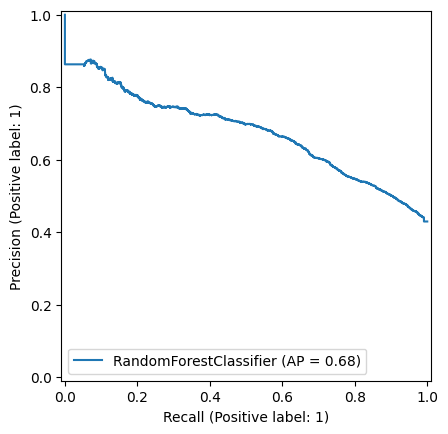

In [72]:
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.show()

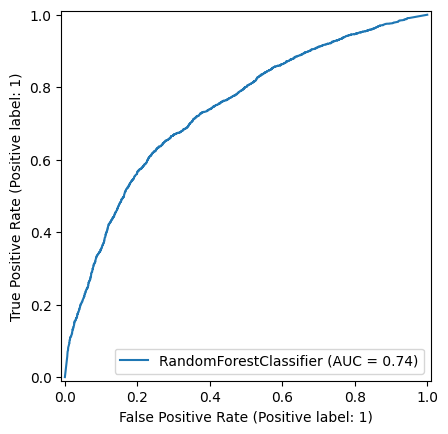

In [73]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

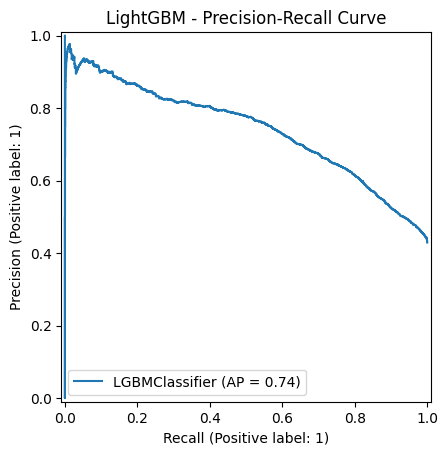

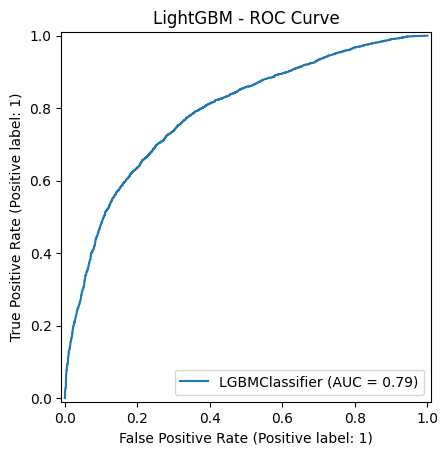

In [74]:
# Plot Precision-Recall Curve for LightGBM
PrecisionRecallDisplay.from_estimator(lgb, X_test, y_test)
plt.title('LightGBM - Precision-Recall Curve')
plt.show()

# Plot ROC Curve for LightGBM
RocCurveDisplay.from_estimator(lgb, X_test, y_test)
plt.title('LightGBM - ROC Curve')
plt.show()

In [77]:
def shap_analysis(model, X_train, X_test, class_idx="auto", max_display=20):
    """
    Robust SHAP analysis for tree models.
    - Works with RF / XGB / LGBM, binary or multiclass.
    - Handles SHAP outputs that are list or 3-D arrays.
    - Plots beeswarm + bar and returns top-features.
    """
    import numpy as np
    import pandas as pd
    import shap
    import matplotlib.pyplot as plt

    # Ensure DataFrame (for feature names)
    Xtr = X_train if hasattr(X_train, "columns") else pd.DataFrame(X_train)
    Xte = X_test  if hasattr(X_test,  "columns") else pd.DataFrame(X_test)

    explainer = shap.TreeExplainer(
        model,
        data=Xtr,
        model_output="probability",
        feature_perturbation="interventional",
    )

    sv_raw = explainer.shap_values(Xte)

    # ---- normalize to a list of 2-D arrays: [(n_samples, n_features), ...] ----
    if isinstance(sv_raw, list):
        sv_list = [np.asarray(sv) for sv in sv_raw]
    else:
        sv = np.asarray(sv_raw)
        if sv.ndim == 2:
            sv_list = [sv]
        elif sv.ndim == 3:
            # possible shapes: (n, f, C) or (n, C, f) or (n, f, 1)
            if sv.shape[1] == Xte.shape[1] and sv.shape[2] >= 1:      # (n, f, C)
                sv_list = [sv[..., c] for c in range(sv.shape[2])]
            elif sv.shape[2] == Xte.shape[1] and sv.shape[1] >= 1:    # (n, C, f)
                sv_list = [sv[:, c, :] for c in range(sv.shape[1])]
            elif sv.shape[2] == 1:                                    # (n, f, 1)
                sv_list = [sv[..., 0]]
            else:
                raise ValueError(f"Unexpected SHAP shape: {sv.shape}")
        else:
            raise ValueError(f"Unexpected SHAP ndim: {sv.ndim}")

    # choose which class to PLOT
    if len(sv_list) == 1:
        sv_plot = sv_list[0]
    else:
        if class_idx == "auto" and len(sv_list) == 2:
            sv_plot = sv_list[1]            # positive class by default
        elif isinstance(class_idx, int):
            sv_plot = sv_list[class_idx]
        else:
            sv_plot = sv_list[0]

    # plots
    shap.summary_plot(sv_plot, Xte, max_display=max_display); plt.show()
    shap.summary_plot(sv_plot, Xte, plot_type="bar", max_display=max_display); plt.show()

    # mean |SHAP| importance (averaged across classes if multiclass)
    if len(sv_list) == 1:
        imp = np.abs(sv_list[0]).mean(axis=0)
    else:
        imp = np.mean([np.abs(sv).mean(axis=0) for sv in sv_list], axis=0)

    top = pd.Series(imp, index=Xte.columns).sort_values(ascending=False)

    return {"explainer": explainer, "shap_values_list": sv_list, "top_features": top}


100%|===================| 14321/14326 [43:22<00:00]       

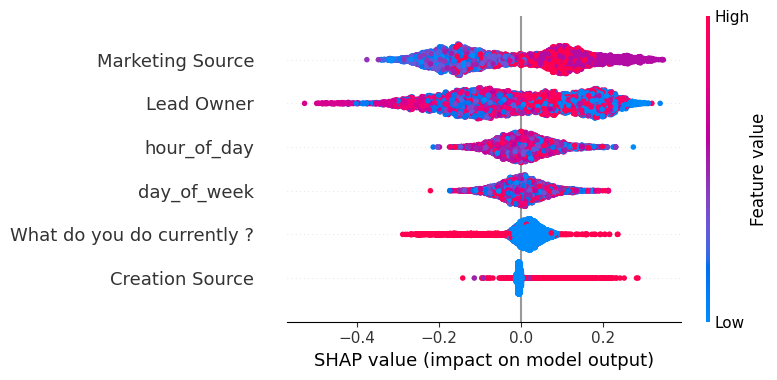

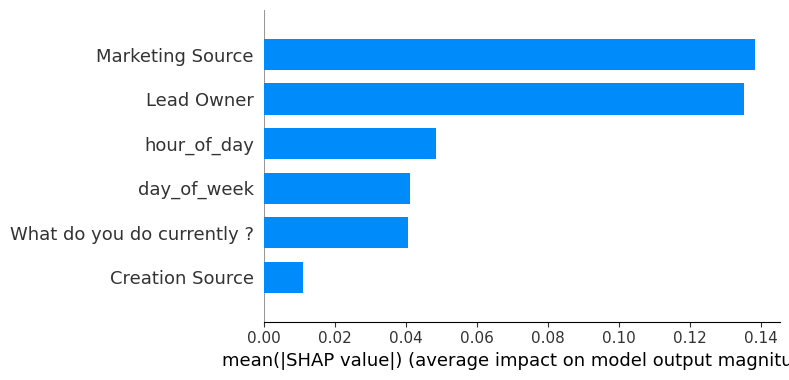

100%|===================| 7143/7163 [00:32<00:00]       

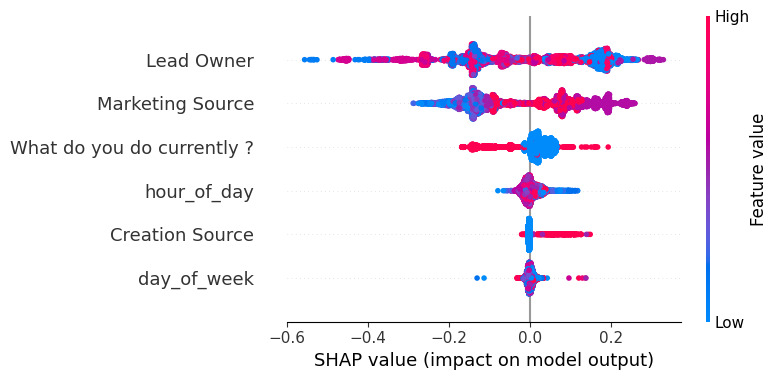

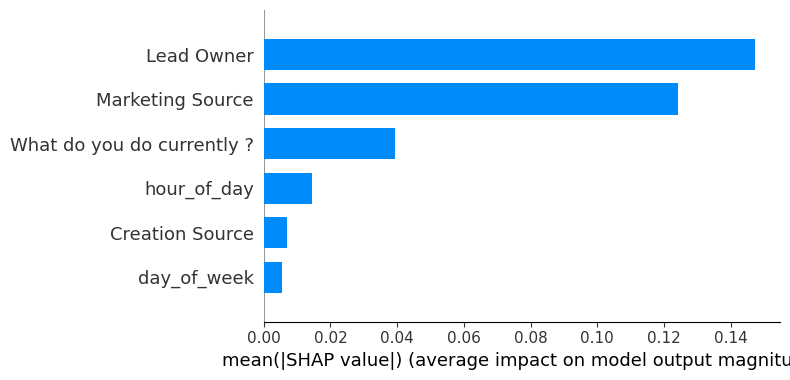

 99%|===================| 7093/7163 [00:52<00:00]       

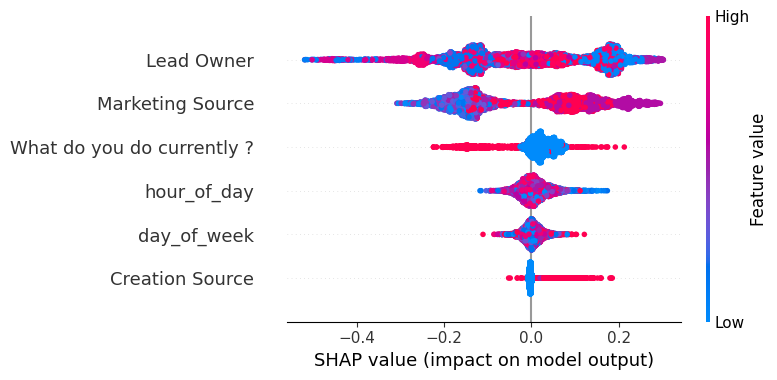

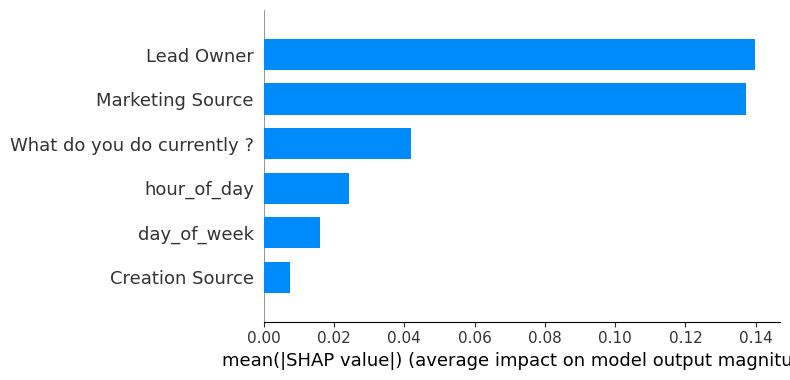

,0
Marketing Source,0.138415
Lead Owner,0.135276
hour_of_day,0.048382
day_of_week,0.041308
What do you do currently ?,0.040668
Creation Source,0.011176


In [78]:
# binary: positive class plotted by default
out_rf  = shap_analysis(rf,  X_train, X_test)
out_xgb = shap_analysis(xgb, X_train, X_test)
out_lgb = shap_analysis(lgb, X_train, X_test)

# pick a specific class to plot (e.g., class 2)
# out = shap_analysis(model, X_train, X_test, class_idx=2)

out_rf["top_features"].head(20)


In [79]:
out_xgb['top_features'].head(20)

,0
Lead Owner,0.147387
Marketing Source,0.124046
What do you do currently ?,0.039312
hour_of_day,0.014375
Creation Source,0.007119
day_of_week,0.005376


In [81]:
out_lgb['top_features'].head(20)

,0
Lead Owner,0.139894
Marketing Source,0.137092
What do you do currently ?,0.041990
hour_of_day,0.024167
day_of_week,0.015996
Creation Source,0.007599
